In [1]:
import json
import pickle
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering, AffinityPropagation, SpectralClustering
from sklearn.decomposition import TruncatedSVD

from tqdm.auto import tqdm
from pathlib import Path


def reduction_dim(dict_lex, n_components=4):
    dict_lex_reduced = {}
    for k, v in dict_lex.items():
        svd = TruncatedSVD(n_components=n_components)
        svd.fit(np.array([e[1] for e in v]))
        dict_lex_reduced[k] = [(e[0], svd.transform([e[1]])[0]) for e in v]
    return dict_lex_reduced


def plot_clusters(liste_lex, cluster, N_CLUSTERS:int = None, type: str = "lex", print:bool = False, save:bool = True) -> None:
    plt.figure(figsize=(20, 20))

    if isinstance(cluster, AffinityPropagation):
        plt.title(f"AffinityPropagation")
        for i in range(N_CLUSTERS):
            plt.scatter(
                [e[1][0] for e in liste_lex],
                [e[1][1] for e in liste_lex],
                c=cluster.labels_.astype(float),
                # cmap="viridis",
                label=i,
            )

        plt.scatter(
            [e[0] for e in cluster.cluster_centers_],
            [e[1] for e in cluster.cluster_centers_],
            c="black",
            s=200,
            alpha=0.5,
            label="Centers",
        )

    elif isinstance(cluster, KMeans):
        plt.title(f"KMeans")

        for i in range(N_CLUSTERS):
            plt.scatter(
                [e[1][0] for e in liste_lex],
                [e[1][1] for e in liste_lex],
                c=cluster.labels_.astype(float),
                # cmap="viridis",
                label=i,
            )
        plt.scatter(
            [e[0] for e in cluster.cluster_centers_],
            [e[1] for e in cluster.cluster_centers_],
            c="black",
            s=200,
            alpha=0.5,
            label="Centers",
        )
        #
        # plt.scatter(
        #     [e[1][0] for e in liste_lex],
        #     [e[1][1] for e in liste_lex],
        #     c=cluster.labels_,
        #     cmap="viridis",
        #     label=cluster.labels_,
        # )
        # plt.scatter(
        #     [e[0] for e in cluster.cluster_centers_],
        #     [e[1] for e in cluster.cluster_centers_],
        #     c="black",
        #     s=200,
        #     alpha=0.5,
        #     # label="Centers",
        # )

    elif isinstance(cluster, AgglomerativeClustering):
        plt.title(f"AgglomerativeClustering")
        plt.scatter(
            [e[1][0] for e in liste_lex],
            [e[1][1] for e in liste_lex],
            c=cluster.labels_,
            cmap="viridis",
            label=cluster.labels_,
        )


    elif isinstance(cluster, SpectralClustering):
        plt.title(f"SpectralClustering")
        plt.scatter(
            [e[1][0] for e in liste_lex],
            [e[1][1] for e in liste_lex],
            c=cluster.labels_,
            cmap="viridis",
            label=cluster.labels_,
        )

    elif isinstance(cluster, DBSCAN):
        plt.title(f"DBSCAN")
        plt.scatter(
            [e[1][0] for e in liste_lex],
            [e[1][1] for e in liste_lex],
            c=cluster.labels_,
            cmap="viridis",
            label=cluster.labels_,
        )
        plt.scatter(
            [e[0] for e in cluster.cluster_centers_],
            [e[1] for e in cluster.cluster_centers_],
            c="black",
            s=200,
            alpha=0.5,
            # label="Centers",
        )



    else:
        raise ValueError("Cluster inconnu")


    if N_CLUSTERS is not None:
        title = f"{cluster.__class__.__name__}_{N_CLUSTERS}_clusters_{type}"
    else:
        title = f"{cluster.__class__.__name__}_{type}"

    plt.legend()
    if save: plt.savefig(f"imgs/clusters/{title}.png")
    if print: plt.show()
    plt.close()


def save_clusters(liste_lex, cluster, N_CLUSTERS:int = None, type: str = "lex") -> None:
    Path("clusters").mkdir(parents=True, exist_ok=True)
    if N_CLUSTERS is not None:
        title = f"{cluster.__class__.__name__}_{N_CLUSTERS}_clusters_{type}"
    else:
        title = f"{cluster.__class__.__name__}_{type}"
    with open(f"clusters/{title}.pickle", mode="wb") as f:
        pickle.dump(cluster, f)
    with open(f"clusters/{title}_liste_lex.pickle", mode="wb") as f:
        pickle.dump(liste_lex, f)
    print(f"Clusters {title} sauvegardés")

def clusters_to_json(liste_lex, cluster, N_CLUSTERS:int = None, type: str = "lex") -> None:
    Path("clusters").mkdir(parents=True, exist_ok=True)
    if N_CLUSTERS is not None:
        title = f"{cluster.__class__.__name__}_{N_CLUSTERS}_clusters_{type}"
    else:
        title = f"{cluster.__class__.__name__}_{type}"

    with open(f"clusters/{title}.json", mode="w") as f:
        json.dump({"clusters": cluster.labels_.tolist(), "liste_lex": [e[0] for e in liste_lex]}, f)


with open("collection_textes.pickle", mode="rb") as f:
    collection_textes = pickle.load(f)

N_COMPONENTS = 2
N_CLUSTERS = 10


In [2]:
allecarts = [e.ecarts for e in collection_textes]
alllex = [e.lexicalites for e in collection_textes]

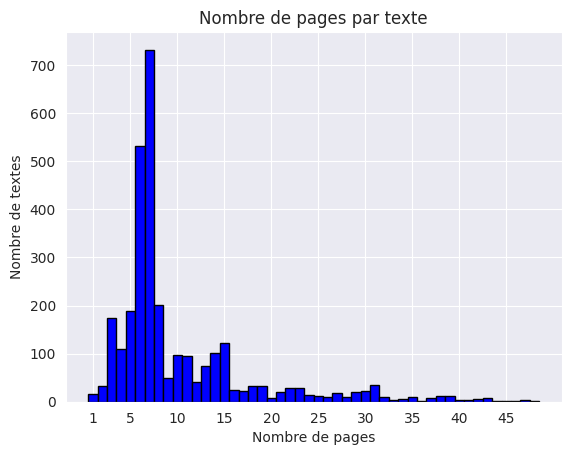

In [3]:
stat = [len(e) for e in allecarts if len(e) < 50]
stat1 = [len(e) for e in alllex if len(e) < 50]
# plt.hist(stat, bins=50, range=(0, 50), color="blue", edgecolor="black")
plt.hist(stat1, bins=np.arange(1, 50) - 0.5, range=(0, 50), color="blue", edgecolor="black")
plt.xticks([1] + list(range(0, 50, 5)[1:]))
plt.figsize = (20, 20)
plt.xlabel("Nombre de pages")
plt.ylabel("Nombre de textes")
plt.title("Nombre de pages par texte")
plt.savefig("imgs/histo_nb_pages.png")
plt.show()


In [4]:
dict_lex = {taile: [] for taile in range(1000)}
for i, lex in enumerate(alllex):
    dict_lex[len(lex)].append((i, lex))

dict_lex = {k: v for k, v in dict_lex.items() if v}

# _ = [print(k, len(v)) for k, v in dict_lex.items()]


In [5]:
dict_ecarts = {taile: [] for taile in range(1000)}
for i, ecart in enumerate(allecarts):
    dict_ecarts[len(ecart)].append((i, ecart))

dict_ecarts = {k: v for k, v in dict_ecarts.items() if v}

# _ = [print(k, len(v)) for k, v in dict_ecarts.items()]

In [6]:
# dict_lex_sub_40 = {k: v for k, v in dict_lex.items() if k < 40}
# dict_lex_sup_2 = {k: v for k, v in dict_lex.items() if k > 2}
dict_lex_sup_n_sub = {k: v for k, v in dict_lex.items() if N_COMPONENTS < k < 80}
dict_ecarts_sup_n_sub = {k: v for k, v in dict_ecarts.items() if N_COMPONENTS < k < 80}


In [7]:
dict_lex_reduced = reduction_dim(dict_lex_sup_n_sub, n_components=N_COMPONENTS)
dict_ecarts_reduced = reduction_dim(dict_ecarts_sup_n_sub, n_components=N_COMPONENTS)


/home/marceau/PycharmProjects/memoire/venv/lib64/python3.11/site-packages/sklearn/decomposition/_truncated_svd.py:268: RuntimeWarning: invalid value encountered in divide
  self.explained_variance_ratio_ = exp_var / full_var
/home/marceau/PycharmProjects/memoire/venv/lib64/python3.11/site-packages/sklearn/decomposition/_truncated_svd.py:268: RuntimeWarning: invalid value encountered in divide
  self.explained_variance_ratio_ = exp_var / full_var
/home/marceau/PycharmProjects/memoire/venv/lib64/python3.11/site-packages/sklearn/decomposition/_truncated_svd.py:268: RuntimeWarning: invalid value encountered in divide
  self.explained_variance_ratio_ = exp_var / full_var
/home/marceau/PycharmProjects/memoire/venv/lib64/python3.11/site-packages/sklearn/decomposition/_truncated_svd.py:268: RuntimeWarning: invalid value encountered in divide
  self.explained_variance_ratio_ = exp_var / full_var
/home/marceau/PycharmProjects/memoire/venv/lib64/python3.11/site-packages/sklearn/decomposition/_tru

In [8]:
liste_lex = [e for v in dict_lex_reduced.values() for e in v if len(e[1]) == 2]
liste_ecarts = [e for v in dict_ecarts_reduced.values() for e in v if len(e[1]) == 2]


In [9]:
# aff = AffinityPropagation(damping = 0.9, max_iter = 1000).fit(np.array([e[1] for e in liste_lex]))
# aff2 = AffinityPropagation(damping = 0.9, max_iter = 1000).fit(np.array([e[1] for e in liste_ecarts]))
#
# plot_clusters(liste_lex, aff)
# plot_clusters(liste_ecarts, aff2, type="ecarts")


for N_CLUSTERS in tqdm(range(2, 20)):

    kmeans = KMeans(n_clusters=N_CLUSTERS, random_state=0, n_init="auto").fit(np.array([e[1] for e in liste_lex]))
    kmeans2 = KMeans(n_clusters=N_CLUSTERS, random_state=0, n_init="auto").fit(np.array([e[1] for e in liste_ecarts]))

    plot_clusters(liste_lex, kmeans, N_CLUSTERS)
    plot_clusters(liste_ecarts, kmeans2, N_CLUSTERS, type="ecarts")
    #
    # save_clusters(liste_lex, kmeans, N_CLUSTERS)
    # save_clusters(liste_ecarts, kmeans2, N_CLUSTERS, type="ecarts")
    #
    # clusters_to_json(liste_lex, kmeans, N_CLUSTERS)
    # clusters_to_json(liste_ecarts, kmeans2, N_CLUSTERS, type="ecarts")
    #
    # agg = AgglomerativeClustering(n_clusters=N_CLUSTERS).fit(np.array([e[1] for e in liste_lex]))
    # agg2 = AgglomerativeClustering(n_clusters=N_CLUSTERS).fit(np.array([e[1] for e in liste_ecarts]))
    #
    # plot_clusters(liste_lex, agg, N_CLUSTERS)
    # plot_clusters(liste_ecarts, agg2, N_CLUSTERS, type="ecarts")
    #
    # spec = SpectralClustering(n_clusters=N_CLUSTERS).fit(np.array([e[1] for e in liste_lex]))
    # spec2 = SpectralClustering(n_clusters=N_CLUSTERS).fit(np.array([e[1] for e in liste_ecarts]))
    #
    # plot_clusters(liste_lex, spec, N_CLUSTERS)
    # plot_clusters(liste_ecarts, spec2, N_CLUSTERS, type="ecarts")


  0%|          | 0/18 [00:00<?, ?it/s]

In [10]:
type(liste_lex[0][1])


numpy.ndarray

In [11]:
with open("clusters/KMeans_10_clusters_lex.pickle", mode="rb") as f:
    clusters = pickle.load(f)

with open("clusters/KMeans_10_clusters_ecarts.pickle", mode="rb") as f:
    clustersecarts = pickle.load(f)

clusters.labels_


array([5, 5, 5, ..., 3, 3, 3], dtype=int32)

In [12]:
for i, cluster in enumerate(clusters.labels_):
    if cluster == 10:
        print(liste_lex[i][0])


In [13]:
liste_lex[0]


(80, array([ 0.93572212, -0.15630301]))

In [14]:
liste_lex[0][1].tolist()


[0.935722117796316, -0.1563030100781035]

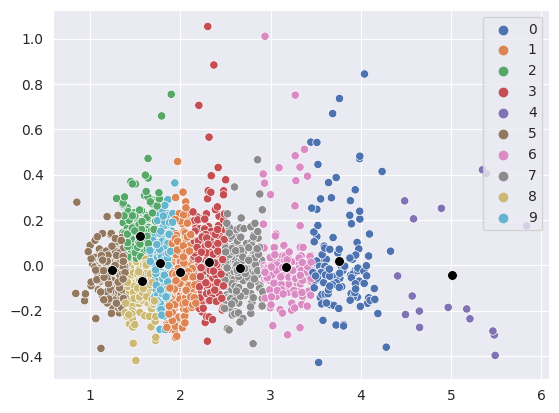

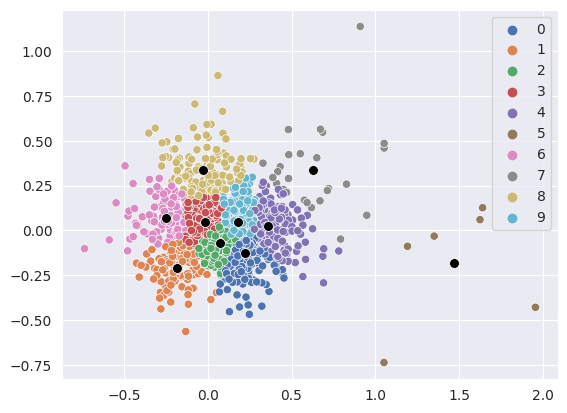

In [15]:
import seaborn as sns
N_CLUSTERS = 10

kmeans = KMeans(n_clusters=N_CLUSTERS, random_state=0, n_init="auto").fit(np.array([e[1] for e in liste_lex]))
kmeans2 = KMeans(n_clusters=N_CLUSTERS, random_state=0, n_init="auto").fit(np.array([e[1] for e in liste_ecarts]))


sns.scatterplot(x=[e[1][0] for e in liste_lex], y=[e[1][1] for e in liste_lex], hue=kmeans.labels_, palette="deep", legend="full")
sns.scatterplot(x=[e[0] for e in kmeans.cluster_centers_], y=[e[1] for e in kmeans.cluster_centers_], color="k", s=50)
plt.savefig("imgs/2d_lex.png")
plt.show()

sns.scatterplot(x=[e[1][0] for e in liste_ecarts], y=[e[1][1] for e in liste_ecarts], hue=kmeans2.labels_, palette="deep", legend="full")
sns.scatterplot(x=[e[0] for e in kmeans2.cluster_centers_], y=[e[1] for e in kmeans2.cluster_centers_], color="k", s=50)
plt.savefig("imgs/2d_ecarts.png")
plt.show()



In [16]:
from io import StringIO

def truc(km, type_="lex"):
    with StringIO() as f:

        seen_clusters = set()
        for i, cluster in enumerate(km.labels_):
            if cluster not in seen_clusters:
                seen_clusters.add(cluster)
            else:
                continue

            txt = collection_textes[i]
            print(f"{i = }\n{cluster = }\n{txt.path = }\n{txt.lexicalite = }\n{txt.n_pages = }\n{txt.ecart = }\n{txt.ecarts = }\nTexte = ", *txt.texte, file=f, end="\n\n\n", sep="\n")
            print(cluster, txt.lexicalite)

        with open(f"test_{N_CLUSTERS}_clusters_{type_}.txt", mode="w") as f2:
            f2.write(f.getvalue())

def truc_seq(km, type_="lex"):
    with StringIO() as f:

        not_seen = np.unique(km.labels_)
        while not_seen.size:

            for i, cluster in enumerate(km.labels_):
                if cluster == not_seen[0]:
                    not_seen = np.delete(not_seen, 0)
                else:
                    if type(cluster) != type(not_seen[0]):
                        print(type(cluster))
                        print(type(not_seen[0]))
                        raise

                    continue

                txt = collection_textes[i]
                print(f"{i = }\n{cluster = }\n{txt.path = }\n{txt.lexicalite = }\n{txt.n_pages = }\n{txt.ecart = }\n{txt.ecarts = }\nTexte = ", *txt.texte, file=f, end="\n\n\n", sep="\n")
                print(cluster, txt.lexicalite)

                if not_seen.size == 0:
                    print("break")
                    break

        with open(f"test_sequentiel_{N_CLUSTERS}_clusters_{type_}.txt", mode="w") as f2:
            f2.write(f.getvalue())


In [17]:
truc(kmeans)
truc_seq(kmeans)

truc(kmeans2, type_="ecarts")
truc_seq(kmeans2, type_="ecarts")


5 0.6798603026775321
2 0.6513339466421343
8 0.6231571377202445
9 0.6072538860103627
1 0.6033732317736671
3 0.6537489469250211
7 0.6240601503759399
6 0.6023391812865497
0 0.6518918918918919
4 0.6005361930294906
0 0.6518918918918919
1 0.6033732317736671
2 0.6414427157001414
3 0.6537489469250211
4 0.6005361930294906
5 0.6798603026775321
6 0.6023391812865497
7 0.7002427184466019
8 0.6231571377202445
9 0.6072538860103627
break
2 0.6798603026775321
9 0.7085514834205934
3 0.5339805825242718
0 0.5726718885987816
4 0.6104477611940299
1 0.6513339466421343
6 0.6265723270440252
8 0.6259791122715405
7 0.5791982057751612
5 0.5806264501160093
0 0.5726718885987816
1 0.6513339466421343
2 0.6328828828828829
3 0.6888150609080842
4 0.6201612903225806
5 0.5806264501160093
6 0.649025069637883
7 0.6542404473438956
8 0.5973988439306358
9 0.6293890805764156
break


In [18]:
kmeans

KMeans(n_clusters=10, n_init='auto', random_state=0)

In [19]:
from io import StringIO

with StringIO() as f:
    not_seen = np.unique(kmeans.labels_)

    for i, cluster in enumerate(clusters.labels_):
        if cluster == not_seen[0]:
            not_seen = np.delete(not_seen, 0)
        else:
            continue

        txt = collection_textes[i]
        print(f"{i = }\n{cluster = }\n{txt.path = }\n{txt.lexicalite = }\n{txt.n_pages = }\n{txt.ecarts = }\nTexte = ", *txt.texte, file=f, end="\n\n\n", sep="\n")
        print(cluster, txt.lexicalite)

        if not_seen.size == 0:
            break

    with open("test_sequentiel_" + str(N_CLUSTERS) + "_clusters.txt", mode="w") as f2:
        f2.write(f.getvalue())



0 0.6579754601226994


In [20]:
[e[1][0] for e in liste_lex].__len__()


2957

In [21]:
[e[1][1] for e in liste_lex].__len__()


2957

In [22]:
kmeans2.labels_.__len__()


2786

In [23]:
np.unique(kmeans2.labels_)


array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int32)